In [5]:
from collections import Counter

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

import lightgbm as lgm

from sklearn import preprocessing
from pycaret.classification import *

import seaborn as sns
sns.set_theme(style="ticks")

In [30]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 520)

# Data acquisition

In [25]:
#PATH = '../../Downloads/titanic/train.csv'
PATH = 'fake_data.csv'
df = pd.read_csv(PATH)
df.shape

(378110, 177)

In [ ]:
df.head(3)

In [ ]:

# train.is_fraud.value_counts()

#  EDA

### Check classfication balance

<AxesSubplot:>

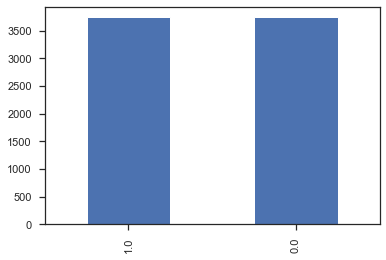

In [49]:
train.is_fraud.value_counts().plot(kind='bar')

In [81]:
eda_df = pd.concat([train.iloc[:1000,:10], train.iloc[:1000,-10:]], axis=1)
eda_df.shape

(1000, 20)

In [82]:
eda_df

,orderId,customerId,sumUndiscountedPriceAmount,sumDiscountedPriceAmount,avgCountItemDeclined,avgCountItemSuccess,maxRatioItemDeclined,minRatioItemDeclined,avgRatioItemDeclined,ratioItemOnceDeclined,BABY_countEaches,PET_countItems,PET_countEaches,HEALTH_countItems,HEALTH_countEaches,HOME_countItems,HOME_countEaches,paymentType,cardType,is_fraud
0,1032174434,1301477839,3.357373,12.609504,4.547609,3.709061,-10.685645,-8.472807,-6.292777,-1.142159,82,31,89,1,38,27,36,VISA,CARD,1.0
1,1126063982,1990986923,2.590765,4.435780,15.888595,-0.177176,3.502039,2.004653,-2.219287,-10.722340,93,27,102,2,28,29,35,VISA,CARD,1.0
2,1666242355,1290867053,5.034808,7.862361,11.008606,0.180365,2.914572,-6.903989,-6.410451,-5.522901,85,27,88,3,33,35,24,APPLE_PAY,CARD,0.0
3,1678599599,1377620455,2.168783,-5.732419,-0.422822,-9.586718,0.186531,0.084984,18.924032,6.976542,103,29,89,4,36,45,29,MASTERCARD,CARD,1.0
4,955925905,1878295515,-2.683738,1.184870,-12.492860,-14.469541,1.357502,1.077847,-10.673478,2.263298,82,28,90,3,32,36,32,APPLE_PAY,CARD,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1864849265,1377141296,-4.435526,3.386803,11.727578,-16.724464,9.542222,-7.421869,-10.379592,-5.256912,87,28,86,0,34,39,44,APPLE_PAY,CARD,0.0
996,1815825431,1070143321,4.581264,6.399104,-7.501878,-5.177890,-5.868238,14.051386,-7.741125,-1.360438,108,32,94,3,34,35,25,VISA,CARD,1.0
997,474629696,74606479,-4.946830,7.528557,-4.280902,5.936657,-1.900445,-17.666315,-13.332568,-6.888910,102,36,71,7,39,34,26,AMEX,CARD,1.0
998,1335130291,2091852168,-1.684549,-0.447588,10.985908,4.741599,3.871691,-4.574512,2.438356,-5.684939,111,24,94,3,35,39,41,APPLE_PAY,CARD,0.0


In [83]:
profile = ProfileReport(eda_df, title="Pandas Profiling Ocado Report")
profile.to_file("eda_ocado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model + Tuning

In [51]:
s = setup(train, target = '???')

,Description,Value
0,Session id,4990
1,Target,is_fraud
2,Target type,Binary
3,Original data shape,"(7486, 177)"
4,Transformed data shape,"(7486, 177)"
5,Transformed train set shape,"(5240, 177)"
6,Transformed test set shape,"(2246, 177)"
7,Ordinal features,1
8,Numeric features,174
9,Categorical features,2


In [52]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5710
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6430
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4200
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.4710
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8350
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5960
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.3520
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9300
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8160
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.5750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

# Evaluation

In [54]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…